'rv' Datasets and Options
============================

Setup
-----------------------------

Let's first make sure we have the latest version of PHOEBE 2.2 installed. (You can comment out this line if you don't use pip for your installation or don't want to update to the latest release).

In [ ]:
!pip install -I "phoebe>=2.2,<2.3"

As always, let's do imports and initialize a logger and a new Bundle.  See [Building a System](building_a_system.ipynb) for more details.

In [1]:
%matplotlib inline

In [2]:
import phoebe
from phoebe import u # units

logger = phoebe.logger()

b = phoebe.default_binary()

Dataset Parameters
--------------------------

Let's add an RV dataset to the Bundle (see also the [rv API docs](../api/phoebe.parameters.dataset.rv.md)).  Some parameters are only visible based on the values of other parameters, so we'll pass `check_visible=False` (see the [filter API docs](../api/phoebe.parameters.ParameterSet.filter.md) for more details).  These visibility rules will be explained below.

In [3]:
b.add_dataset('rv')
print(b.get_dataset(kind='rv', check_visible=False))

ParameterSet: 19 parameters
      compute_times@rv01@dataset: [] d
*    compute_phases@rv01@dataset: []
  compute_phases_t0@rv01@dataset: t0_supconj
           passband@rv01@dataset: Johnson:V
   intens_weighting@rv01@dataset: energy
      times@primary@rv01@dataset: [] d
    times@secondary@rv01@dataset: [] d
        rvs@primary@rv01@dataset: [] km / s
      rvs@secondary@rv01@dataset: [] km / s
     sigmas@primary@rv01@dataset: [] km / s
   sigmas@secondary@rv01@dataset: [] km / s
    ld_mode@primary@rv01@dataset: interp
  ld_mode@secondary@rv01@dataset: interp
    ld_func@primary@rv01@dataset: logarithmic
  ld_func@secondary@rv01@dataset: logarithmic
  ld_coeffs_source@primary@rv...: auto
  ld_coeffs_source@secondary@...: auto
  ld_coeffs@primary@rv01@dataset: [0.5 0.5]
  ld_coeffs@secondary@rv01@da...: [0.5 0.5]


For information on the included passband-dependent parameters (not mentioned below), see the section on the [lc dataset](LC.ipynb) (these are used only to compute fluxes when `rv_method` is 'flux-weighted')

### times

In [4]:
print(b.get_parameter(qualifier='times', component='primary'))

Parameter: times@primary@rv01@dataset
                       Qualifier: times
                     Description: Observed times
                           Value: [] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



### rvs

The `rvs` parameter is only visible if the respective `times` parameter is not empty.

In [5]:
b.set_value('times', component='primary', value=[0])

In [6]:
print(b.get_parameter(qualifier='rvs', component='primary'))

Parameter: rvs@primary@rv01@dataset
                       Qualifier: rvs
                     Description: Observed radial velocity
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: times:<notempty>



### sigmas

The `sigmas` parameter is also only visible if the respective `times` parameter is not empty.

In [7]:
print(b.get_parameter(qualifier='sigmas', component='primary'))

Parameter: sigmas@primary@rv01@dataset
                       Qualifier: sigmas
                     Description: Observed uncertainty on rv
                           Value: [] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: times:<notempty>



### compute_times / compute_phases

See the [Compute Times & Phases tutorial](compute_times_phases.ipynb).

In [8]:
print(b.get_parameter(qualifier='compute_times'))

Parameter: compute_times@rv01@dataset
                       Qualifier: compute_times
                     Description: Times to use during run_compute.  If empty, will use times parameter
                           Value: [] d
                  Constrained by: 
                      Constrains: compute_phases@rv01@dataset
                      Related to: period@binary@component, dpdt@binary@component, compute_phases_t0@rv01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@rv01@dataset



In [9]:
print(b.get_parameter(qualifier='compute_phases', context='dataset'))

Parameter: compute_phases@rv01@dataset
                       Qualifier: compute_phases
                     Description: Phases associated with compute_times.
                           Value: []
                  Constrained by: compute_times@rv01@dataset, period@binary@component, dpdt@binary@component, compute_phases_t0@rv01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component
                      Constrains: None
                      Related to: compute_times@rv01@dataset, period@binary@component, dpdt@binary@component, compute_phases_t0@rv01@dataset, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component



In [10]:
print(b.get_parameter(qualifier='compute_phases_t0'))

Parameter: compute_phases_t0@rv01@dataset
                       Qualifier: compute_phases_t0
                     Description: t0 to use when converting between compute_times and compute_phases.
                           Value: t0_supconj
                         Choices: t0_supconj, t0_perpass, t0_ref
                  Constrained by: 
                      Constrains: compute_phases@rv01@dataset
                      Related to: compute_times@rv01@dataset, period@binary@component, dpdt@binary@component, t0_supconj@binary@component, t0_perpass@binary@component, t0_ref@binary@component, compute_phases@rv01@dataset
                 Only visible if: hierarchy.is_meshable:False



Compute Options
------------------

Let's look at the compute options (for the default PHOEBE 2 backend) that relate to the RV dataset.

Other compute options are covered elsewhere:
* parameters related to dynamics are explained in the section on the [orb dataset](ORB.ipynb)
* parameters related to meshing, eclipse detection, and subdivision (used if `rv_method`=='flux-weighted') are explained in the section on the [mesh dataset](MESH.ipynb)
* parameters related to computing fluxes (used if `rv_method`=='flux-weighted') are explained in the section on the [lc dataset](LC.ipynb)

In [11]:
print(b.get_compute())

ParameterSet: 19 parameters
  dynamics_method@phoebe01@co...: keplerian
           ltte@phoebe01@compute: False
   irrad_method@phoebe01@compute: wilson
  boosting_method@phoebe01@co...: none
  eclipse_method@phoebe01@com...: native
  horizon_method@phoebe01@com...: boolean
  mesh_method@primary@phoebe0...: marching
  mesh_method@secondary@phoeb...: marching
  ntriangles@primary@phoebe01...: 1500
  ntriangles@secondary@phoebe...: 1500
  distortion_method@primary@p...: roche
  distortion_method@secondary...: roche
    atm@primary@phoebe01@compute: ck2004
  atm@secondary@phoebe01@compute: ck2004
        enabled@phoebe01@compute: True
  rv_method@primary@phoebe01@...: flux-weighted
  rv_method@secondary@phoebe0...: flux-weighted
  rv_grav@primary@phoebe01@co...: False
  rv_grav@secondary@phoebe01@...: False


### rv_method

In [12]:
print(b.get_parameter(qualifier='rv_method', component='primary'))

Parameter: rv_method@primary@phoebe01@compute
                       Qualifier: rv_method
                     Description: Method to use for computing RVs (must be flux-weighted for Rossiter-McLaughlin effects)
                           Value: flux-weighted
                         Choices: flux-weighted, dynamical
                  Constrained by: 
                      Constrains: None
                      Related to: None



If `rv_method` is set to 'dynamical' then the computed radial velocities are simply the z-velocities of the centers of mass of each component.  In this case, only the dynamical options are relevant.  For more details on these, see the section on the [orb dataset](ORB.ipynb).

If `rv_method` is set to 'flux-weighted' then radial velocities are determined by the z-velocity of each visible surface element of the mesh, weighted by their respective intensities.  Since the stars are placed in their orbits by the dynamic options, the section on the [orb dataset](ORB.ipynb) is still applicable.  So are the meshing options described in [mesh dataset](MESH.ipynb) and the options for computing fluxes in [lc dataset](LC.ipynb).  See also the [Rossiter-McLaughlin example](../examples/rossiter_mclaughlin.ipynb).

### rv_grav

In [13]:
print(b.get_parameter(qualifier='rv_grav', component='primary'))

Parameter: rv_grav@primary@phoebe01@compute
                       Qualifier: rv_grav
                     Description: Whether gravitational redshift effects are enabled for RVs
                           Value: False
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: rv_method:flux-weighted



See the [Gravitational Redshift example](../examples/grav_redshift.ipynb) for more details on the influence this parameter has on radial velocities.

Synthetics
------------------

In [14]:
b.set_value_all('times', phoebe.linspace(0,1,101))

In [15]:
b.run_compute(irrad_method='none')

<ParameterSet: 4 parameters | components: primary, secondary>

In [16]:
print(b.filter(context='model').twigs)

['times@primary@rv01@phoebe01@latest@rv@model', 'rvs@primary@rv01@phoebe01@latest@rv@model', 'times@secondary@rv01@phoebe01@latest@rv@model', 'rvs@secondary@rv01@phoebe01@latest@rv@model']


In [17]:
print(b.get_parameter(qualifier='times', component='primary', kind='rv', context='model'))

Parameter: times@primary@latest@model
                       Qualifier: times
                     Description: Model (synthetic) times
                           Value: [0.   0.01 0.02 ... 0.98 0.99 1.  ] d
                  Constrained by: 
                      Constrains: None
                      Related to: None



In [18]:
print(b.get_parameter(qualifier='rvs', component='primary', kind='rv', context='model'))

Parameter: rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Model (synthetic) radial velocities
                           Value: [  0.13568518 -40.16927882 -40.1705636  ...  40.17567288
  40.16257634   0.13568518] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None
                 Only visible if: times:<notempty>



Plotting
---------------

By default, RV datasets plot as 'rvs' vs 'times'.

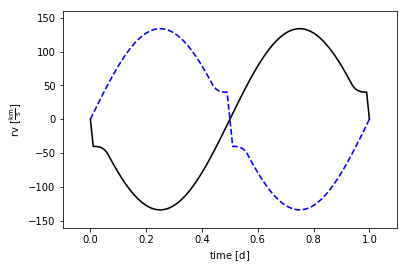

In [19]:
afig, mplfig = b.plot(show=True)

Since these are the only two columns available in the synthetic model, the only other options is to plot in phase instead of time.

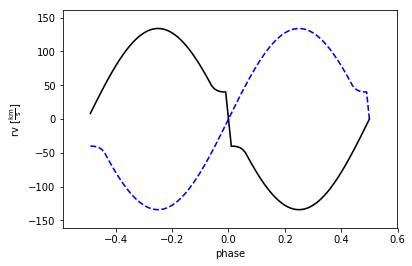

In [20]:
afig, mplfig = b.plot(x='phases', show=True)

In system hierarchies where there may be multiple periods, it is also possible to determine whose period to use for phasing.

In [21]:
print(b.filter(qualifier='period').components)

['primary', 'secondary', 'binary']


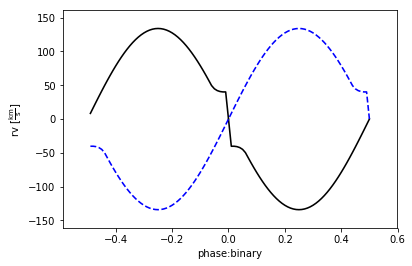

In [22]:
afig, mplfig = b.plot(x='phases:binary', show=True)

Mesh Fields
---------------------


By adding a mesh dataset and setting the columns parameter, radial velocities per-element quantities can be exposed and plotted.  Since the radial velocities are flux-weighted, the flux-related quantities are also included (except relative intensities/luminosities that would require pblum scaling).  For a description of these, see the section on the [lc dataset](LC.ipynb).

Let's add a mesh at the first time of the rv dataset and re-call run_compute

In [23]:
b.add_dataset('mesh', times=[0], dataset='mesh01')

Wed, 04 Sep 2019 15:52 BUNDLE       WARNING mesh dataset uses 'compute_times' instead of 'times', applying value sent as 'times' to 'compute_times'.


<ParameterSet: 8 parameters | contexts: dataset, compute, constraint>

In [24]:
print(b.get_parameter(qualifier='columns').choices)

['volume', 'xs', 'ys', 'zs', 'vxs', 'vys', 'vzs', 'nxs', 'nys', 'nzs', 'us', 'vs', 'ws', 'vus', 'vvs', 'vws', 'nus', 'nvs', 'nws', 'areas', 'loggs', 'teffs', 'rprojs', 'mus', 'visibilities', 'visible_centroids', 'rs', 'abs_intensities@rv01', 'abs_normal_intensities@rv01', 'boost_factors@rv01', 'ldint@rv01', 'abs_pblum_ext@rv01', 'ptfarea@rv01', 'rvs@rv01']


In [25]:
b.set_value('columns', value=['rvs@rv01'])

In [26]:
b.run_compute(irrad_method='none')

Wed, 04 Sep 2019 15:52 BUNDLE       WARNING overwriting model: latest


<ParameterSet: 16 parameters | kinds: rv, mesh>

In [27]:
print(b.get_model().datasets)

['rv01', 'mesh01']


These new columns are stored with the rv's dataset tag, but with the mesh model-kind.

In [28]:
print(b.filter(dataset='rv01', kind='mesh', context='model').twigs)

['00.000000@rvs@primary@rv01@phoebe01@latest@mesh@model', '00.000000@rvs@secondary@rv01@phoebe01@latest@mesh@model']


Any of these columns are then available to use as edge or facecolors when plotting the mesh (see the section on the [MESH dataset](MESH)).

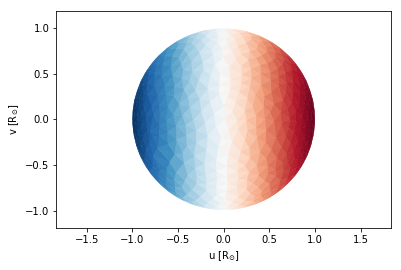

In [29]:
afig, mplfig = b.filter(kind='mesh').plot(fc='rvs', ec='None', show=True)

### rvs

In [30]:
print(b.get_parameter(qualifier='rvs', 
                      component='primary', 
                      dataset='rv01', 
                      kind='mesh', 
                      context='model'))

Parameter: 00.000000@rvs@primary@latest@model
                       Qualifier: rvs
                     Description: Per-element value of rvs for rv01 dataset
                           Value: [-3.51428103e+00 -1.88225026e-05  3.51419791e+00 ...
  3.84090451e+01  3.72780179e+01  3.84944182e+01] km / s
                  Constrained by: 
                      Constrains: None
                      Related to: None

